In [1]:
import sys

# Conda enviroment paths
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/lib')
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/Mod/Fem')

import ObjectsFem
import FreeCAD
import numpy as np
import pandas as pd
import mplhep as hep
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

In [2]:
plt.style.use(hep.style.ATLAS)

plt.rcParams['font.size'] = 10

In [3]:
doc_name = 'hex_1250'
doc = FreeCAD.open(f'files/{doc_name}/{doc_name}_mech.FCStd')

results_obj = doc.getObject('CCX_Results')
mesh_obj = doc.getObject('MeshGmsh')
model_obj = doc.getObject('Container')

# Isometric view plots

In [4]:
outer_faces_cir = [1, 2] # Face-3: Bottom; Face-2: Top
outer_faces_hex = [2, 1, 3, 7, 8, 6, 5] # Face-4: Bottom; Face-5: Top

outer_faces_geo = outer_faces_cir if 'cir' in doc_name else outer_faces_hex

nodes_dict = dict(mesh_obj.FemMesh.Nodes)

all_faces_nodes_coords = []
all_faces_von_mises = []
all_faces_displacement = []

for nFace in outer_faces_geo:

    face_idx = mesh_obj.FemMesh.getFacesByFace(model_obj.Shape.Faces[nFace-1])
    faces_nodes_coords, von_mises, displacement = [], [], []
    
    for idx_f in face_idx:
        nodes_idx = mesh_obj.FemMesh.getElementNodes(idx_f)
        nodes_coords = [nodes_dict[idx_n] for idx_n in nodes_idx]
        
        von_mises_mean = np.mean([results_obj.vonMises[idx_n-1] for idx_n in nodes_idx])
        displacement_mean = np.mean([results_obj.DisplacementLengths[idx_n-1] for idx_n in nodes_idx])
        
        faces_nodes_coords.append(nodes_coords)
        von_mises.append(von_mises_mean)
        displacement.append(displacement_mean)

    all_faces_nodes_coords.append(faces_nodes_coords)
    all_faces_von_mises.append(von_mises)
    all_faces_displacement.append(displacement)

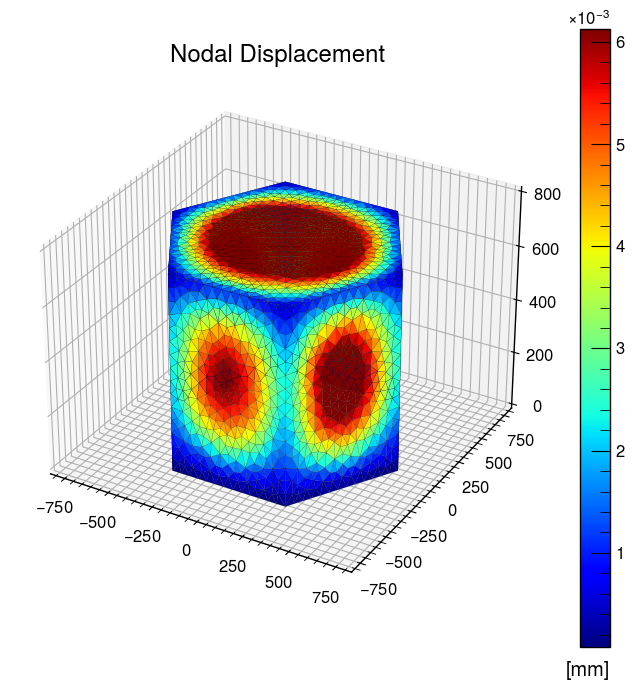

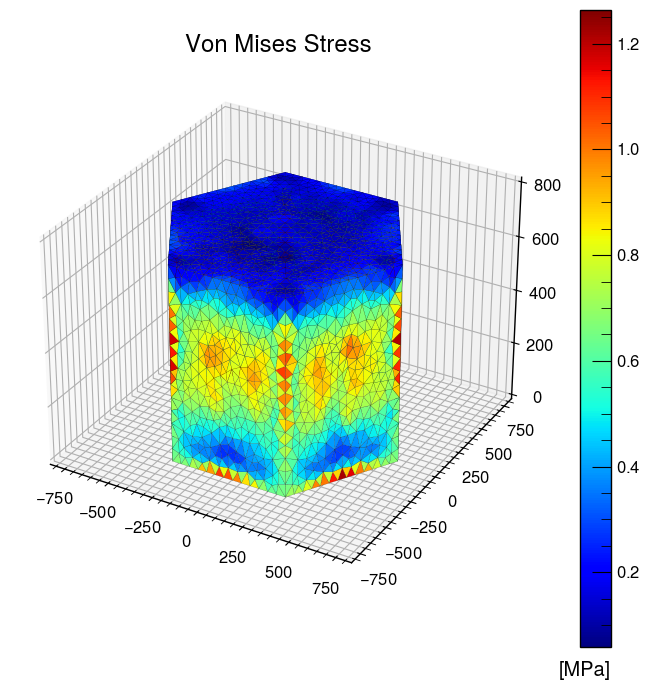

In [5]:
cmap = plt.get_cmap('jet')

# DISPLACEMENT

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

norm_d = mcolors.Normalize(vmin=min(min(all_faces_displacement)), vmax=max(max(all_faces_displacement)))
for faces_nodes_coords, displacement in zip(all_faces_nodes_coords, all_faces_displacement):
    colors_d = cmap(norm_d(displacement))
    poly3d = Poly3DCollection(faces_nodes_coords, facecolors=colors_d, linewidths=.1, edgecolors='k')
    ax.add_collection3d(poly3d)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm_d, cmap=cmap), ax=ax)
cbar.ax.set_xlabel('[mm]', rotation=0)
plt.title('Nodal Displacement')
fig.tight_layout()
fig.savefig('plots/hex_iso_displacement.pdf', dpi=fig.dpi)
plt.show()

# VON MISES

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

norm_vm = mcolors.Normalize(vmin=min(min(all_faces_von_mises)), vmax=max(max(all_faces_von_mises)))
for faces_nodes_coords, von_mises in zip(all_faces_nodes_coords, all_faces_von_mises):
    colors_vm = cmap(norm_vm(von_mises))
    poly3d = Poly3DCollection(faces_nodes_coords, facecolors=colors_vm, linewidths=.1, edgecolors='k')
    ax.add_collection3d(poly3d)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm_vm, cmap=cmap), ax=ax)
cbar.ax.set_xlabel('[MPa]', rotation=0)
plt.title('Von Mises Stress')
fig.tight_layout()
fig.savefig('plots/hex_iso_vonmises.pdf', dpi=fig.dpi)
plt.show()

# Histograms

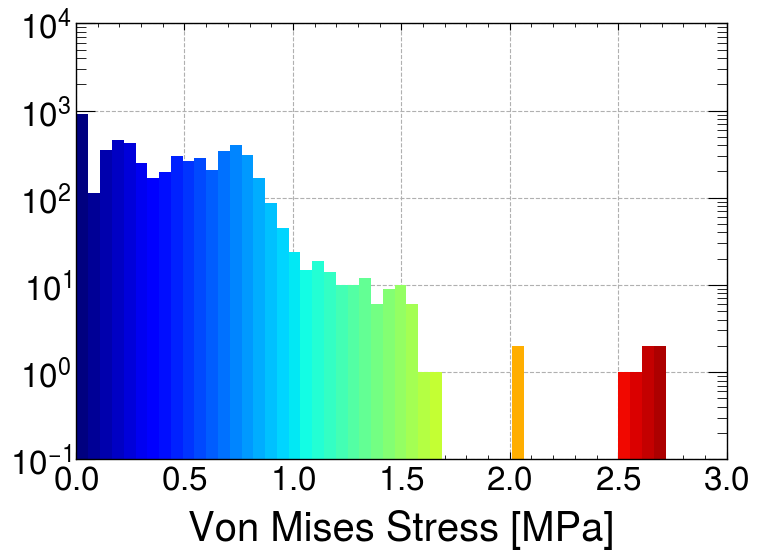

In [7]:
plt.style.use(hep.style.ATLAS)
plt.rcParams['font.size'] = 20
'''
# DISPLACEMENT

cmap = plt.get_cmap('jet')

displacement = results_obj.DisplacementLengths

cnts, values, bars = plt.hist(displacement, bins=40)
for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(cmap(i/len(values)))

plt.xlabel('Nodal Displacement [mm]', loc='center')
plt.yscale('log')
plt.grid(ls='--')
plt.gca().set_axisbelow(True)

fig = plt.gcf()
fig.tight_layout()
#fig.savefig('plots/hex_hist_displacement.pdf', dpi=fig.dpi)

plt.show()
'''
# VON MISES

von_mises = results_obj.vonMises

cnts, values, bars = plt.hist(von_mises, bins=50)
for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(cmap(i/len(values)))

plt.xlabel('Von Mises Stress [MPa]', loc='center')
plt.yscale('log')
plt.grid(ls='--')
plt.gca().set_axisbelow(True)

fig = plt.gcf()
fig.tight_layout()
#fig.savefig('plots/hex_hist_vonmises.pdf', dpi=fig.dpi)

plt.show()

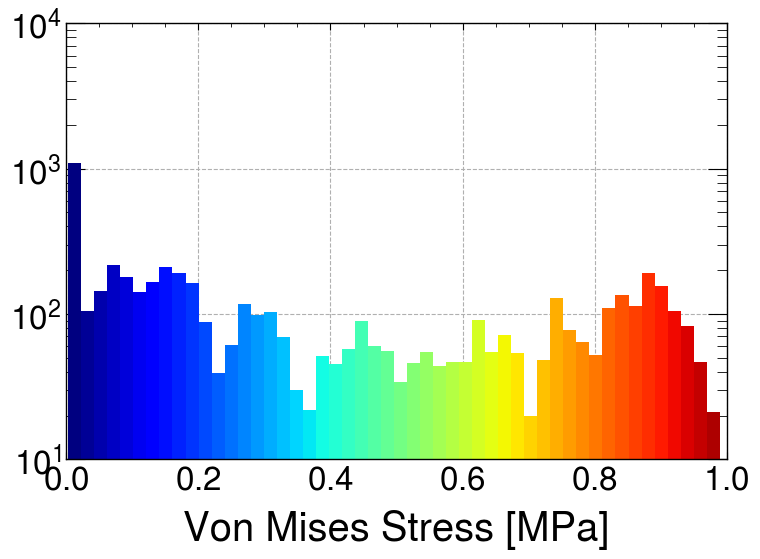

In [8]:
doc_name = 'cir_1250'
doc = FreeCAD.open(f'files/{doc_name}/{doc_name}_mech.FCStd')

results_obj = doc.getObject('CCX_Results')
mesh_obj = doc.getObject('MeshGmsh')
model_obj = doc.getObject('Container')

von_mises = results_obj.vonMises

cnts, values, bars = plt.hist(von_mises, bins=50)
for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(cmap(i/len(values)))

plt.xlabel('Von Mises Stress [MPa]', loc='center')
plt.yscale('log')
plt.grid(ls='--')
plt.gca().set_axisbelow(True)

fig = plt.gcf()
fig.tight_layout()
#fig.savefig('plots/hex_hist_vonmises.pdf', dpi=fig.dpi)

plt.show()

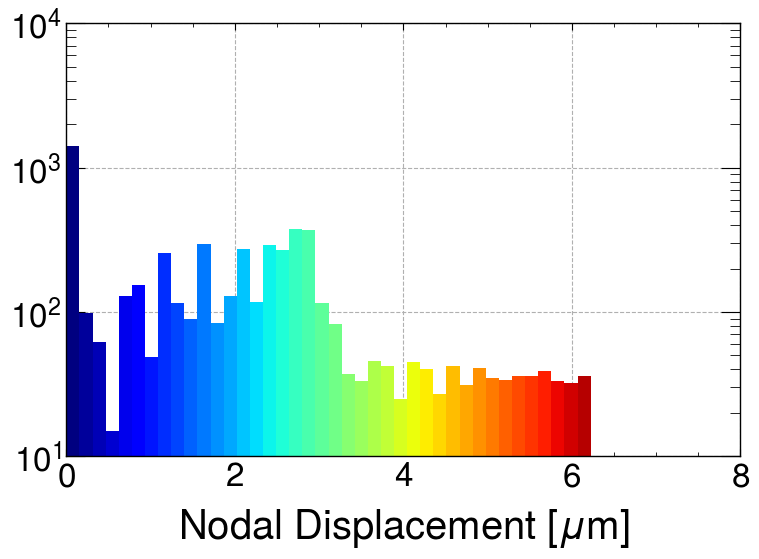

In [12]:
doc_name = 'cir_1250'
doc = FreeCAD.open(f'files/{doc_name}/{doc_name}_mech.FCStd')

results_obj = doc.getObject('CCX_Results')
mesh_obj = doc.getObject('MeshGmsh')
model_obj = doc.getObject('Container')

displacement = results_obj.DisplacementLengths

cnts, values, bars = plt.hist(1e3*np.array(displacement), bins=40)
for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(cmap(i/len(values)))

plt.xlabel('Nodal Displacement [$\\mu$m]', loc='center')
plt.yscale('log')
plt.grid(ls='--')
plt.gca().set_axisbelow(True)

fig = plt.gcf()
fig.tight_layout()
#fig.savefig('plots/hex_hist_displacement.pdf', dpi=fig.dpi)

plt.show()